## 1. Pandas 란?
***
파일의 데이터를 모두 메모리로 읽은다음 메모리 위에서 데이터를 처리한다.

 ### Pandas 자료구조란?
>  * Series는 1차원 데이터를 다루는 데 효과적이다
 * DataFrame은 행과 열로 구성된 2차원 데이터를 다루는 데 효과적인 자료구조입니다.
 * 엑셀과 거의 비슷하게 row와 column으로 이뤄진 데이터 객체를 만들 수 있도록 해줍니다.
***

In [1]:
import pandas as pd # panda 를 pd 로 정의한다
from pandas import Series, DataFrame
import numpy as np

### 오류가 날시
> * conda install pandas
* pip3 install pandas

## 2. 데이터 생성
***


In [2]:
temp= pd.Series([ 4,  7, -5,  3])
temp

0    4
1    7
2   -5
3    3
dtype: int64

In [3]:
temp.values

array([ 4,  7, -5,  3], dtype=int64)

In [4]:
temp.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
temp2=pd.Series ((2,3,4,6) ,dtype=int,index=('a','b','c','d'))
temp2

a    2
b    3
c    4
d    6
dtype: int32

In [6]:
temp2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [7]:
type(temp2.values)

numpy.ndarray

In [8]:
temp2[0]

2

In [9]:
temp2['a']

2

In [10]:
temp.append(temp2) #추가 해줄때는 따로 값을 추가 하지 못하고 pandas 객체로 만들어 append

0    4
1    7
2   -5
3    3
a    2
b    3
c    4
d    6
dtype: int64

### 2.2 시계열 자료
> 시계열 자료는 인덱스가 날짜 혹은 시간인 데이터를 말한다.
 * DatetimeIndex 자료형으로 만들어야 한다.
 * 미리 정의된 자료형으로 생성 가능하다.
 * 다른 자료형도 시계형으로 형변환이 쉽다.

#### pd.to_datetime 함수
 *  날짜/시간을 나타내는 문자열을 자동으로 datetime 자료형으로 바꾼 후 DatetimeIndex 자료형 인덱스를 생성한다.
 * 2018,1,1 은 에러남 2018,01,01 이나 2018, 1, 1 월자리에 두자리로 해야함

In [11]:
date_str = ["2018 01 1", "2018 1, 4", "2018, 1, 5", "2018, 1, 6"]
idx = pd.to_datetime(date_str)
idx

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

In [12]:
np.random.seed(0)
temp_time= pd.Series(np.random.randn(4), index=idx)
temp_time

2018-01-01    1.764052
2018-01-04    0.400157
2018-01-05    0.978738
2018-01-06    2.240893
dtype: float64

#### pd.date_range 함수
 * Pandas 로 만든 자로구조의 values 값만 확인해서 ndarray 값으로 리턴해준다.
 * 모든 날짜/시간을 일일히 입력할 필요없이 시작일과 종료일 또는 시작일과 기간을 입력하면 범위 내의 인덱스를 생성해 준다.

In [13]:
pd.date_range("2018-4-1", "2018-4-30")

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [14]:
dates= pd.date_range('20180719',periods=10)
dates

DatetimeIndex(['2018-07-19', '2018-07-20', '2018-07-21', '2018-07-22',
               '2018-07-23', '2018-07-24', '2018-07-25', '2018-07-26',
               '2018-07-27', '2018-07-28'],
              dtype='datetime64[ns]', freq='D')

#### 날짜 생성시 테크닉
##### freq 인수로 특정한 날짜만 생성되도록 할 수 있다. 많이 사용되는 freq 인수값은 다음과 같다.

* s: 초
* T: 분
* H: 시간
* D: 일(day)
* B: 주말이 아닌 평일
* W: 주(일요일)
* W-MON: 주(월요일)
* M: 각 달(month)의 마지막 날
* MS: 각 달의 첫날
* BM: 주말이 아닌 평일 중에서 각 달의 마지막 날
* BMS: 주말이 아닌 평일 중에서 각 달의 첫날
* WOM-2THU: 각 달의 두번째 목요일
* Q-JAN: 각 분기의 첫달의 마지막 날
* Q-DEC: 각 분기의 마지막 달의 마지막 날

In [15]:
pd.date_range("2018-4-1", "2018-12-31", freq="BM")

DatetimeIndex(['2018-04-30', '2018-05-31', '2018-06-29', '2018-07-31',
               '2018-08-31', '2018-09-28', '2018-10-31', '2018-11-30',
               '2018-12-31'],
              dtype='datetime64[ns]', freq='BM')

### 2.3 DataFrame
DataFrame은 여러 개의 칼럼(Column)으로 구성된 2차원 형태의 자료구조입니다.
> DataFrame 자료구조 생성법
 * pd.Dataframe(value)
 * 리스트, 튜플, 딕셔너리 값을 사용하여 만들 수 있다.

#### pd.values 함수
 * Pandas 로 만든 자로구조의 values 값만 확인해서 ndarray 값으로 리턴해준다.

#### pd.index 함수
 * Pandas 로 만든 자로구조의 index 값만 확인해서 pandas 객체로 리턴해준다.
 * Pandas 객체지만 리스트처럼 indexing 가능하다.
 
#### pd.columns 함수
 * 열 방향의 index를 리턴해준다.

In [16]:
raw_data = {'col0': [1, 2, 3, 4],
            'col1': [10, 20, 30, 40],
            'col2': [100, 200, 300, 400]}

frame1 = pd.DataFrame(raw_data)
frame1

,col0,col1,col2
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400


In [17]:
frame1.index

RangeIndex(start=0, stop=4, step=1)

In [18]:
frame1.columns

Index(['col0', 'col1', 'col2'], dtype='object')

In [19]:
frame1.values

array([[  1,  10, 100],
       [  2,  20, 200],
       [  3,  30, 300],
       [  4,  40, 400]], dtype=int64)

In [20]:
pd.DataFrame(frame1,columns=['col2','col1','col0']) # 열의 순서를 변경 할 수 있다

,col2,col1,col0
0,100,10,1
1,200,20,2
2,300,30,3
3,400,40,4


In [21]:
frame1['addcol']=[1,np.nan,3,3] # 갯수를 맞추어 추가해주면 된다.
frame1

,col0,col1,col2,addcol
0,1,10,100,1.0
1,2,20,200,NaN
2,3,30,300,3.0
3,4,40,400,3.0


#### 요소 삭제 
> * del -> 기존 데이터 원본을 건드림 조심해서 쓰는게 좋음
* drop -> 데이터 복사를 해서 불필요한 오버헤드가 있을 수 있지만 안정성이 높다.

In [22]:
del frame1["col0"]

In [23]:
frame1

,col1,col2,addcol
0,10,100,1.0
1,20,200,NaN
2,30,300,3.0
3,40,400,3.0


In [24]:
temp_frame=frame1.drop(1)
temp_frame

,col1,col2,addcol
0,10,100,1.0
2,30,300,3.0
3,40,400,3.0


In [25]:
frame1

,col1,col2,addcol
0,10,100,1.0
1,20,200,NaN
2,30,300,3.0
3,40,400,3.0


In [26]:
temp_frame=frame1.drop('col1',axis=1)
temp_frame

,col2,addcol
0,100,1.0
1,200,NaN
2,300,3.0
3,400,3.0


In [27]:
frame2=pd.DataFrame(raw_data,columns=['col0','col1','col2','col3'],
             index=['zero','one','two','three'])
frame2

,col0,col1,col2,col3
zero,1,10,100,NaN
one,2,20,200,NaN
two,3,30,300,NaN
three,4,40,400,NaN


In [28]:
frame2.index.name='num'
frame2.columns.name='칼럼이름'
frame2

칼럼이름,col0,col1,col2,col3
num,,,,
zero,1,10,100,NaN
one,2,20,200,NaN
two,3,30,300,NaN
three,4,40,400,NaN


In [29]:
frame2.fillna(10)

칼럼이름,col0,col1,col2,col3
num,,,,
zero,1,10,100,10
one,2,20,200,10
two,3,30,300,10
three,4,40,400,10


In [30]:
frame3=frame2.T
frame3

num,zero,one,two,three
칼럼이름,,,,
col0,1,2,3,4
col1,10,20,30,40
col2,100,200,300,400
col3,NaN,NaN,NaN,NaN


In [31]:
frame2[:2]

칼럼이름,col0,col1,col2,col3
num,,,,
zero,1,10,100,NaN
one,2,20,200,NaN


In [32]:
frame2.col0

num
zero     1
one      2
two      3
three    4
Name: col0, dtype: int64

In [33]:
frame2.ix["zero"]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


칼럼이름
col0      1
col1     10
col2    100
col3    NaN
Name: zero, dtype: object

In [34]:
frame2.loc['zero'] 

칼럼이름
col0      1
col1     10
col2    100
col3    NaN
Name: zero, dtype: object

In [35]:
frame2.loc[:,'col2':'col3']

칼럼이름,col2,col3
num,,
zero,100,NaN
one,200,NaN
two,300,NaN
three,400,NaN


In [36]:
frame2.iloc[1:3,:2]

칼럼이름,col0,col1
num,,
one,2,20
two,3,30


In [37]:
frame1.describe() # 계산 가능한 모든 값에 대해 알려준다

,col1,col2,addcol
count,4.000000,4.000000,3.000000
mean,25.000000,250.000000,2.333333
std,12.909944,129.099445,1.154701
min,10.000000,100.000000,1.000000
25%,17.500000,175.000000,2.000000
50%,25.000000,250.000000,3.000000
75%,32.500000,325.000000,3.000000
max,40.000000,400.000000,3.000000


In [38]:
frame1.mean()

col1       25.000000
col2      250.000000
addcol      2.333333
dtype: float64

## 3. 데이터 산술연산
***


### 3.1 Series 산술연산
 * Series은 색인이 다른 객체 간의 산술연산을 지원한다. 
 * 두 객체를 연산하면 색인이 통합되고 짝이 맞지 않는 색인의 데이터는 NA값을 가진다.
 * 기본적인 연산을 지원해준다.(+,-,*,/,//,% 등)
 * 산술연산시 연산자가 아닌 산술연산 매서드(함수)를 이용하면, fill_value옵션을 이용해서 NA값을 대처할 수 있다.


In [39]:
stud_1 = pd.Series([10, 20, 30], index=['영어', '통계학', '수리'])
stud_2 = pd.Series([10, 30, 20], index=['수리', '영어', '플밍'])
stud_1

영어     10
통계학    20
수리     30
dtype: int64

In [40]:
stud_2

수리    10
영어    30
플밍    20
dtype: int64

In [41]:
result_sr = stud_1+stud_2 #연산자 이용
result_sr

수리     40.0
영어     40.0
통계학     NaN
플밍      NaN
dtype: float64

In [42]:
result_sr2=stud_1.add(stud_2, fill_value=0) #매서드(함수) 이용
result_sr2

수리     40.0
영어     40.0
통계학    20.0
플밍     20.0
dtype: float64

### 3.2 DataFrame의 산술연산
 * DataFrame도 Series 와 같이 동작한다.
 * 두 객체를 연산하면 색인이 통합되고 짝이 맞지 않는 색인의 데이터는 NA값을 가진다.
 * 기본적인 연산을 지원해준다.(+,-,*,/,//,% 등)
 * 산술연산시 연산자가 아닌 산술연산 매서드(함수)를 이용하면, fill_value옵션을 이용해서 NA값을 대처할 수 있다.

In [43]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)),
                columns=list('bcd'),
                index=['신촌', '수원', '강남'])
df1

,b,c,d
신촌,0.0,1.0,2.0
수원,3.0,4.0,5.0
강남,6.0,7.0,8.0


In [44]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                columns=list('bde'),
                index=['잠실', '신촌', '수원', '용인'])
df2

,b,d,e
잠실,0.0,1.0,2.0
신촌,3.0,4.0,5.0
수원,6.0,7.0,8.0
용인,9.0,10.0,11.0


In [45]:
result_df=df1+df2 #연산자 이용
result_df

,b,c,d,e
강남,NaN,NaN,NaN,NaN
수원,9.0,NaN,12.0,NaN
신촌,3.0,NaN,6.0,NaN
용인,NaN,NaN,NaN,NaN
잠실,NaN,NaN,NaN,NaN


In [46]:
result_df2=df1.add(df2, fill_value=0)  #매서드(함수) 이용
result_df2

,b,c,d,e
강남,6.0,7.0,8.0,NaN
수원,9.0,4.0,12.0,8.0
신촌,3.0,1.0,6.0,5.0
용인,9.0,NaN,10.0,11.0
잠실,0.0,NaN,1.0,2.0


In [47]:
df_copy=result_df2.copy().fillna(0)
df_copy

,b,c,d,e
강남,6.0,7.0,8.0,0.0
수원,9.0,4.0,12.0,8.0
신촌,3.0,1.0,6.0,5.0
용인,9.0,0.0,10.0,11.0
잠실,0.0,0.0,1.0,2.0


> ### df.apply() 함수 
 * 간단하게 다양한 접근을 하기위해 함수를 적용 시킬때 사용
 * 더 많은 조건을 걸때 사용한다고 생각하자.
 * lambda는 함수를 딱 한 줄만으로 만들게 해준는 거라고 생각.

In [48]:
df_copy['b+100']=df_copy['b'].apply(lambda x : int(x+100) )
df_copy

,b,c,d,e,b+100
강남,6.0,7.0,8.0,0.0,106
수원,9.0,4.0,12.0,8.0,109
신촌,3.0,1.0,6.0,5.0,103
용인,9.0,0.0,10.0,11.0,109
잠실,0.0,0.0,1.0,2.0,100


In [49]:
df_copy.apply(lambda x : x.max()-x.min())

b         9.0
c         7.0
d        11.0
e        11.0
b+100     9.0
dtype: float64

## 4. Experiment
***

In [50]:
import pandas as pd
import numpy as np

In [51]:
file_path="./datas/"
file_name=file_path+"airbnb.csv"
df_air=pd.read_csv(file_name)
df_air

,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified
0,6291807,16375951,Entire home/apt,NaN,Jamaica Plain,1,NaN,4,2.0,119.0,14.0,42.298160,-71.111530,2016-05-19 02:58:16.563871
1,2656568,13597630,Entire home/apt,NaN,Back Bay,0,NaN,2,1.0,600.0,1.0,42.348072,-71.076639,2016-05-19 02:58:06.015822
2,10723203,15913699,Private room,NaN,Allston,2,NaN,2,1.0,96.0,1.0,42.350588,-71.129477,2016-05-19 02:57:39.074104
3,10034592,20399668,Private room,NaN,Dorchester,13,5.0,2,1.0,55.0,1.0,42.317168,-71.040483,2016-05-19 02:57:28.669274
4,5454513,4962900,Entire home/apt,NaN,Back Bay,13,4.5,5,2.0,276.0,NaN,42.346598,-71.080123,2016-05-19 02:56:56.182103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,8519646,15098486,Private room,NaN,North End,16,4.5,2,1.0,116.0,1.0,42.364245,-71.052945,2016-05-18 23:41:35.473009
3273,6574771,16881770,Private room,NaN,Dorchester,9,5.0,1,1.0,40.0,3.0,42.323962,-71.058513,2016-05-19 02:20:38.220232
3274,1321422,6608084,Private room,NaN,Dorchester,168,5.0,3,1.0,45.0,1.0,42.308380,-71.046943,2016-05-18 21:23:24.849565
3275,12590656,51449558,Private room,NaN,Dorchester,0,NaN,3,1.0,55.0,2.0,42.321141,-71.056032,2016-05-18 20:23:17.028579


In [52]:
df_air['overall_satisfaction']=df_air.overall_satisfaction.fillna(2)
df_air

,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified
0,6291807,16375951,Entire home/apt,NaN,Jamaica Plain,1,2.0,4,2.0,119.0,14.0,42.298160,-71.111530,2016-05-19 02:58:16.563871
1,2656568,13597630,Entire home/apt,NaN,Back Bay,0,2.0,2,1.0,600.0,1.0,42.348072,-71.076639,2016-05-19 02:58:06.015822
2,10723203,15913699,Private room,NaN,Allston,2,2.0,2,1.0,96.0,1.0,42.350588,-71.129477,2016-05-19 02:57:39.074104
3,10034592,20399668,Private room,NaN,Dorchester,13,5.0,2,1.0,55.0,1.0,42.317168,-71.040483,2016-05-19 02:57:28.669274
4,5454513,4962900,Entire home/apt,NaN,Back Bay,13,4.5,5,2.0,276.0,NaN,42.346598,-71.080123,2016-05-19 02:56:56.182103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,8519646,15098486,Private room,NaN,North End,16,4.5,2,1.0,116.0,1.0,42.364245,-71.052945,2016-05-18 23:41:35.473009
3273,6574771,16881770,Private room,NaN,Dorchester,9,5.0,1,1.0,40.0,3.0,42.323962,-71.058513,2016-05-19 02:20:38.220232
3274,1321422,6608084,Private room,NaN,Dorchester,168,5.0,3,1.0,45.0,1.0,42.308380,-71.046943,2016-05-18 21:23:24.849565
3275,12590656,51449558,Private room,NaN,Dorchester,0,2.0,3,1.0,55.0,2.0,42.321141,-71.056032,2016-05-18 20:23:17.028579


In [53]:
drop_list=['room_id','host_id','room_id','borough',
           'neighborhood','minstay','latitude','longitude']
df_air_contrib=df_air.drop(drop_list,axis=1)
df_air_contrib

,room_type,reviews,overall_satisfaction,accommodates,bedrooms,price,last_modified
0,Entire home/apt,1,2.0,4,2.0,119.0,2016-05-19 02:58:16.563871
1,Entire home/apt,0,2.0,2,1.0,600.0,2016-05-19 02:58:06.015822
2,Private room,2,2.0,2,1.0,96.0,2016-05-19 02:57:39.074104
3,Private room,13,5.0,2,1.0,55.0,2016-05-19 02:57:28.669274
4,Entire home/apt,13,4.5,5,2.0,276.0,2016-05-19 02:56:56.182103
...,...,...,...,...,...,...,...
3272,Private room,16,4.5,2,1.0,116.0,2016-05-18 23:41:35.473009
3273,Private room,9,5.0,1,1.0,40.0,2016-05-19 02:20:38.220232
3274,Private room,168,5.0,3,1.0,45.0,2016-05-18 21:23:24.849565
3275,Private room,0,2.0,3,1.0,55.0,2016-05-18 20:23:17.028579


In [54]:
pd.Timestamp(df_air_contrib['last_modified'][0])

Timestamp('2016-05-19 02:58:16.563871')

### DataFrame 정렬
 * df.sort_values  
     *                  (by=None,# 정렬할 기준 변수       
                    axis = 0 , # 0 or 'index' ,1 or 'columns'  
                    ascending = True, # True: 오름차순 False: 내림차순  
                    inplace = False, # DataFrame 자체를 정렬해서 저장  
                    kind = 'quicksort', # 정렬 알고리즘을 무엇을 사용할건지  
                    na_position='last') # 결측값 위치  

In [55]:
df_air_sort_by_price=df_air_contrib.sort_values(["price"],ascending=True)
df_air_sort_by_price

,room_type,reviews,overall_satisfaction,accommodates,bedrooms,price,last_modified
1679,Entire home/apt,0,2.0,6,3.0,10.0,2016-05-18 23:56:41.809172
866,Entire home/apt,0,2.0,4,1.0,19.0,2016-05-18 21:04:54.980934
57,Private room,20,5.0,2,1.0,20.0,2016-05-19 02:18:03.140493
2349,Private room,0,2.0,1,1.0,24.0,2016-05-18 23:37:27.373325
22,Private room,5,5.0,1,1.0,25.0,2016-05-19 02:51:01.496987
...,...,...,...,...,...,...,...
1203,Entire home/apt,0,2.0,5,3.0,1250.0,2016-05-18 20:54:06.442324
2509,Private room,0,2.0,1,1.0,1372.0,2016-05-19 02:36:56.388321
2683,Private room,0,2.0,2,1.0,1400.0,2016-05-19 00:30:33.499416
2417,Entire home/apt,0,2.0,4,2.0,3000.0,2016-05-18 23:46:13.210277


In [56]:
df_price=df_air_sort_by_price.set_index(['price'])
df_price

,room_type,reviews,overall_satisfaction,accommodates,bedrooms,last_modified
price,,,,,,
10.0,Entire home/apt,0,2.0,6,3.0,2016-05-18 23:56:41.809172
19.0,Entire home/apt,0,2.0,4,1.0,2016-05-18 21:04:54.980934
20.0,Private room,20,5.0,2,1.0,2016-05-19 02:18:03.140493
24.0,Private room,0,2.0,1,1.0,2016-05-18 23:37:27.373325
25.0,Private room,5,5.0,1,1.0,2016-05-19 02:51:01.496987
...,...,...,...,...,...,...
1250.0,Entire home/apt,0,2.0,5,3.0,2016-05-18 20:54:06.442324
1372.0,Private room,0,2.0,1,1.0,2016-05-19 02:36:56.388321
1400.0,Private room,0,2.0,2,1.0,2016-05-19 00:30:33.499416


In [57]:
df_price.sort_index(ascending=False)

,room_type,reviews,overall_satisfaction,accommodates,bedrooms,last_modified
price,,,,,,
4000.0,Entire home/apt,0,2.0,4,1.0,2016-05-18 21:20:39.767639
3000.0,Entire home/apt,0,2.0,4,2.0,2016-05-18 23:46:13.210277
1400.0,Private room,0,2.0,2,1.0,2016-05-19 00:30:33.499416
1372.0,Private room,0,2.0,1,1.0,2016-05-19 02:36:56.388321
1250.0,Entire home/apt,0,2.0,5,3.0,2016-05-18 20:54:06.442324
...,...,...,...,...,...,...
25.0,Shared room,2,2.0,1,1.0,2016-05-19 00:06:01.892148
24.0,Private room,0,2.0,1,1.0,2016-05-18 23:37:27.373325
20.0,Private room,20,5.0,2,1.0,2016-05-19 02:18:03.140493


In [58]:
df_air_sort_by_price.head(10)

,room_type,reviews,overall_satisfaction,accommodates,bedrooms,price,last_modified
1679,Entire home/apt,0,2.0,6,3.0,10.0,2016-05-18 23:56:41.809172
866,Entire home/apt,0,2.0,4,1.0,19.0,2016-05-18 21:04:54.980934
57,Private room,20,5.0,2,1.0,20.0,2016-05-19 02:18:03.140493
2349,Private room,0,2.0,1,1.0,24.0,2016-05-18 23:37:27.373325
22,Private room,5,5.0,1,1.0,25.0,2016-05-19 02:51:01.496987
364,Shared room,2,2.0,1,1.0,25.0,2016-05-19 00:06:01.892148
2559,Private room,2,2.0,2,1.0,25.0,2016-05-18 19:55:39.715895
2932,Private room,16,4.5,2,1.0,25.0,2016-05-19 00:07:26.000609
2940,Private room,13,5.0,2,1.0,25.0,2016-05-19 02:43:06.312884
107,Shared room,1,2.0,1,1.0,27.0,2016-05-19 02:02:05.219212


In [59]:
df_price_state=df_air_contrib.groupby('price')
df_describe=df_price_state.describe()
df_describe

reviews                                                \
         count  mean       std   min   25%   50%   75%   max   
price                                                          
10.0       1.0   0.0       NaN   0.0   0.0   0.0   0.0   0.0   
19.0       1.0   0.0       NaN   0.0   0.0   0.0   0.0   0.0   
20.0       1.0  20.0       NaN  20.0  20.0  20.0  20.0  20.0   
24.0       1.0   0.0       NaN   0.0   0.0   0.0   0.0   0.0   
25.0       5.0   7.6  6.503845   2.0   2.0   5.0  13.0  16.0   
...        ...   ...       ...   ...   ...   ...   ...   ...   
1250.0     1.0   0.0       NaN   0.0   0.0   0.0   0.0   0.0   
1372.0     1.0   0.0       NaN   0.0   0.0   0.0   0.0   0.0   
1400.0     1.0   0.0       NaN   0.0   0.0   0.0   0.0   0.0   
3000.0     1.0   0.0       NaN   0.0   0.0   0.0   0.0   0.0   
4000.0     1.0   0.0       NaN   0.0   0.0   0.0   0.0   0.0   

       overall_satisfaction       ... accommodates      bedrooms            \
                      count mean  ...          75%  max    count mean  std   
price                             ...                                        
10.0                    1.0  2.0  ...          6.0  6.0      1.0  3.0  NaN   
19.0                    1.0  2.0  ...          4.0  4.0      1.0  1.0  NaN   
20.0                    1.0  5.0  ...          2.0  2.0      1.0  1.0  NaN   
24.0                    1.0  2.0  ...          1.0  1.0      1.0  1.0  NaN   
25.0                    5.0  3.7  ...          2.0  2.0      5.0  1.0  0.0   
...                     ...  ...  ...          ...  ...      ...  ...  ...   
1250.0                  1.0  2.0  ...          5.0  5.0      1.0  3.0  NaN   
1372.0                  1.0  2.0  ...          1.0  1.0      1.0  1.0  NaN   
1400.0                  1.0  2.0  ...          2.0  2.0      1.0  1.0  NaN   
3000.0                  1.0  2.0  ...          4.0  4.0      1.0  2.0  NaN   
4000.0                  1.0  2.0  ...          4.0  4.0      1.0  1.0  NaN   

                                 
        min  25%  50%  75%  max  
price                            
10.0    3.0  3.0  3.0  3.0  3.0  
19.0    1.0  1.0  1.0  1.0  1.0  
20.0    1.0  1.0  1.0  1.0  1.0  
24.0    1.0  1.0  1.0  1.0  1.0  
25.0    1.0  1.0  1.0  1.0  1.0  
...     ...  ...  ...  ...  ...  
1250.0  3.0  3.0  3.0  3.0  3.0  
1372.0  1.0  1.0  1.0  1.0  1.0  
1400.0  1.0  1.0  1.0  1.0  1.0  
3000.0  2.0  2.0  2.0  2.0  2.0  
4000.0  1.0  1.0  1.0  1.0  1.0  

[329 rows x 32 columns]

In [60]:
df_price_state

In [61]:
df_price_state.sum().loc[25]

reviews                 38.0
overall_satisfaction    18.5
accommodates             8.0
bedrooms                 5.0
Name: 25.0, dtype: float64

In [62]:
df_cheap=df_air_sort_by_price['price'].apply(lambda x : x<40) #40달러? 미만만true
df_cheap

1679     True
866      True
57       True
2349     True
22       True
        ...  
1203    False
2509    False
2683    False
2417    False
1409    False
Name: price, Length: 3277, dtype: bool

In [63]:
df_cheap_true=df_cheap[df_cheap.values == True] #True 값만 다시 재추출
df_cheap_true

1679    True
866     True
57      True
2349    True
22      True
364     True
2559    True
2932    True
2940    True
107     True
486     True
836     True
729     True
3237    True
916     True
3095    True
2891    True
855     True
921     True
669     True
2658    True
2723    True
3035    True
918     True
2593    True
3096    True
2460    True
569     True
2562    True
3010    True
3053    True
297     True
2782    True
2378    True
2376    True
905     True
133     True
473     True
2439    True
870     True
1122    True
2819    True
2914    True
2791    True
3135    True
2724    True
448     True
1123    True
3007    True
840     True
317     True
2696    True
2965    True
200     True
Name: price, dtype: bool

In [64]:
temp_df_cheap=pd.DataFrame(df_cheap) #DataFrame 으로 만들어줌
temp_df_cheap

,price
1679,True
866,True
57,True
2349,True
22,True
...,...
1203,False
2509,False
2683,False
2417,False


In [65]:
temp_df_cheap=temp_df_cheap[temp_df_cheap.price == True]
temp_df_cheap

,price
1679,True
866,True
57,True
2349,True
22,True
364,True
2559,True
2932,True
2940,True
107,True


In [66]:
temp_df_cheap_once=pd.DataFrame(df_air_sort_by_price['price'].apply(lambda x : x<40))
temp_df_cheap_once=temp_df_cheap_once[temp_df_cheap_once.price == True]
temp_df_cheap_once

,price
1679,True
866,True
57,True
2349,True
22,True
364,True
2559,True
2932,True
2940,True
107,True


In [67]:
df_air_contrib[(df_air_contrib['price']<40) & (df_air_contrib['price']>20)]

,room_type,reviews,overall_satisfaction,accommodates,bedrooms,price,last_modified
22,Private room,5,5.0,1,1.0,25.0,2016-05-19 02:51:01.496987
107,Shared room,1,2.0,1,1.0,27.0,2016-05-19 02:02:05.219212
133,Shared room,0,2.0,1,1.0,35.0,2016-05-19 01:51:38.844374
200,Private room,0,2.0,2,1.0,39.0,2016-05-19 01:21:29.360269
297,Private room,3,4.5,1,1.0,35.0,2016-05-19 00:41:21.695762
317,Private room,1,2.0,1,1.0,39.0,2016-05-19 00:32:01.499812
364,Shared room,2,2.0,1,1.0,25.0,2016-05-19 00:06:01.892148
448,Shared room,8,5.0,1,1.0,36.0,2016-05-19 00:54:53.776149
473,Shared room,6,4.5,1,1.0,35.0,2016-05-18 23:13:16.917393
486,Private room,0,2.0,1,1.0,27.0,2016-05-18 23:09:03.616181


## 5. Matplotlib 맛보기
***

In [68]:
import matplotlib.pyplot as plt # 간단한 시각화 도구
%matplotlib inline  
# 주피터 노트북 사용시 내부에 그림표시위함

### 오류가 날시
> * conda install -c anaconda matplotlib 
* pip3 install matplotlib

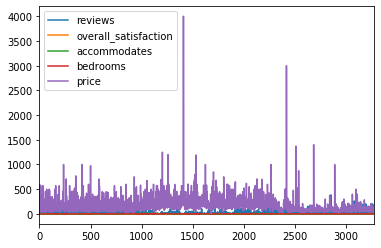

In [69]:
df_air_contrib.plot()

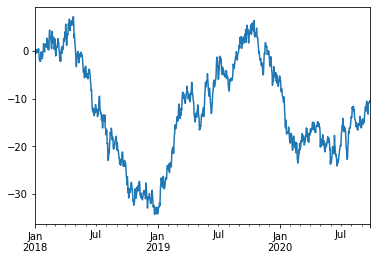

In [70]:
np.random.seed(1000)
ts=pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2018',periods=1000))
ts=ts.cumsum() #누적합
ts.plot()

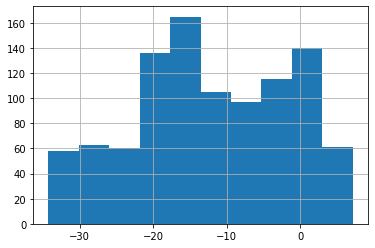

In [71]:
ts.hist()

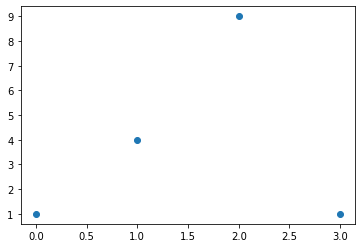

In [72]:
plt.plot([1, 4, 9, 1],'o')
plt.show()

## ○ 참고문서
***


 * [시계열 자료](https://datascienceschool.net/view-notebook/8959673a97214e8fafdb159f254185e9/)
 * [Pandas 기초](http://doorbw.tistory.com/172)
 * [Pandas 기초](http://pinkwink.kr/734?category=522424)
 * [Pandas 산술 연산](http://pyther.tistory.com/6)